In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

<ipython-input-5-bac1a61b4e0b>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Casualties',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
#Extracting important data from the given dataset
data = data[['Year','Month', 'Day', 'Country', 'state', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Casualties', 'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]

In [16]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Casualties      10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

The above data gives us important insight into the number of null values that exist in the given dataset.

We can also extract meaningful data using the following statements

In [27]:
print("Most attacked country: ", data['Country'].value_counts().idxmax())
filtered_city = data[data['city'] != 'Unknown']
print("Most attacked city: ", filtered_city['city'].value_counts().idxmax())
print("Most attacked region: ", data['Region'].value_counts().idxmax())
print("Most attacked country: ", data['Country'].value_counts().idxmax())
filtered_grp = data[data['Group'] != 'Unknown']
print("Most violent group based on number of attacks: ", filtered_grp['Group'].value_counts().idxmax())





Most attacked country:  Iraq
Most attacked city:  Baghdad
Most attacked region:  Middle East & North Africa
Most attacked country:  Iraq
Most violent group based on number of attacks:  Taliban


#Year-wise Number of Attacks

In [28]:
data['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

#Year-wise Terrorist Activity

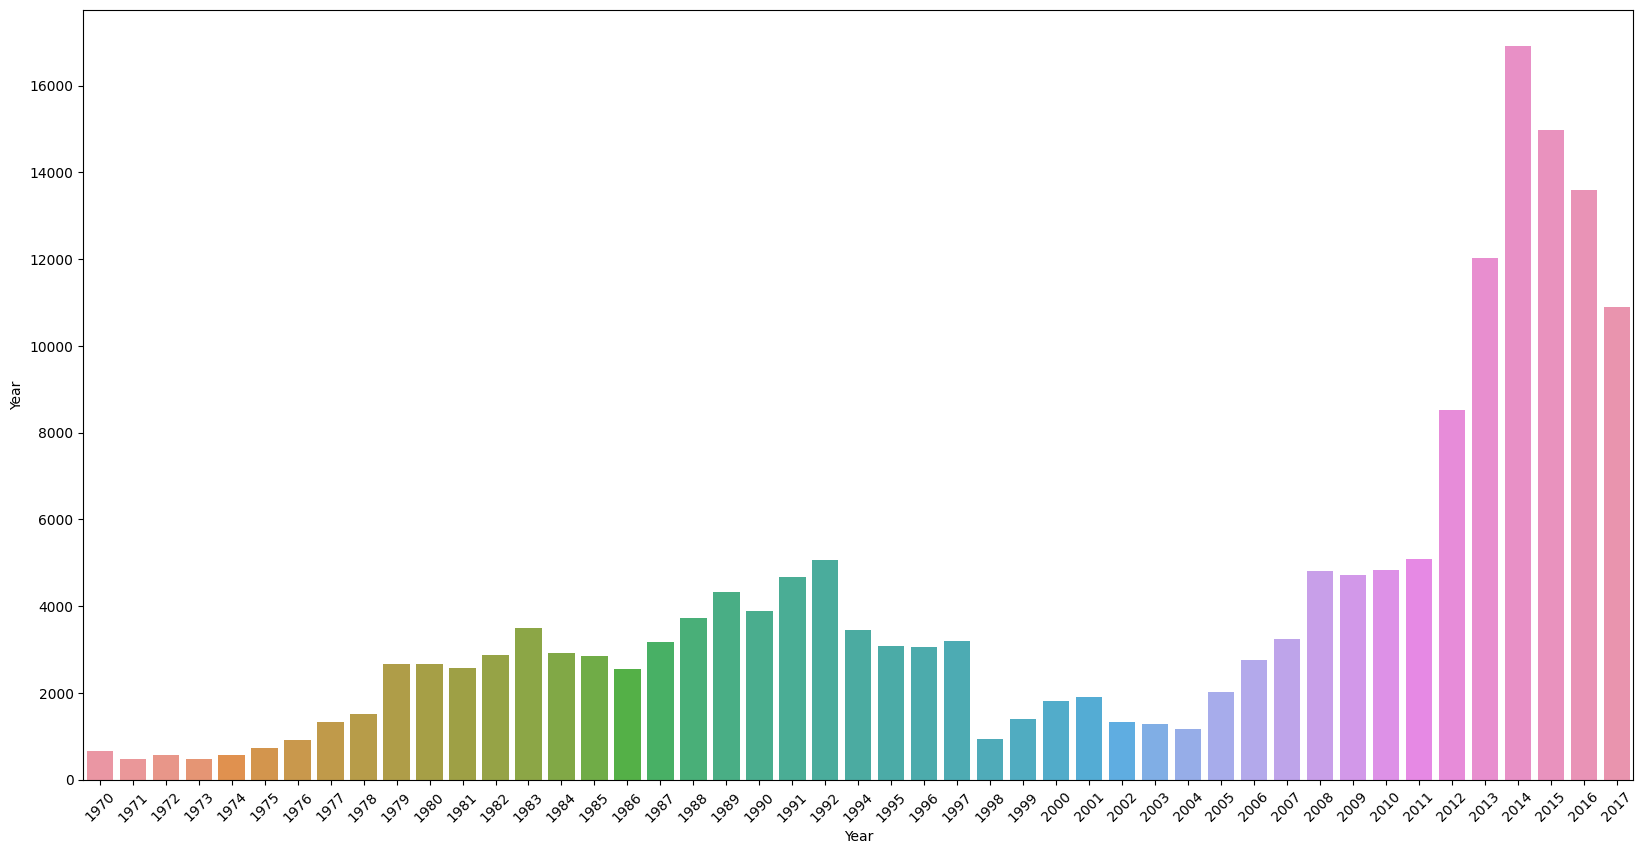

In [34]:
years = data['Year'].unique()
attacks = data['Year'].value_counts().sort_index()
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('No. of attacks')
sns.barplot(x = years, y = attacks)
plt.show()

#Region v/s No. of attacks

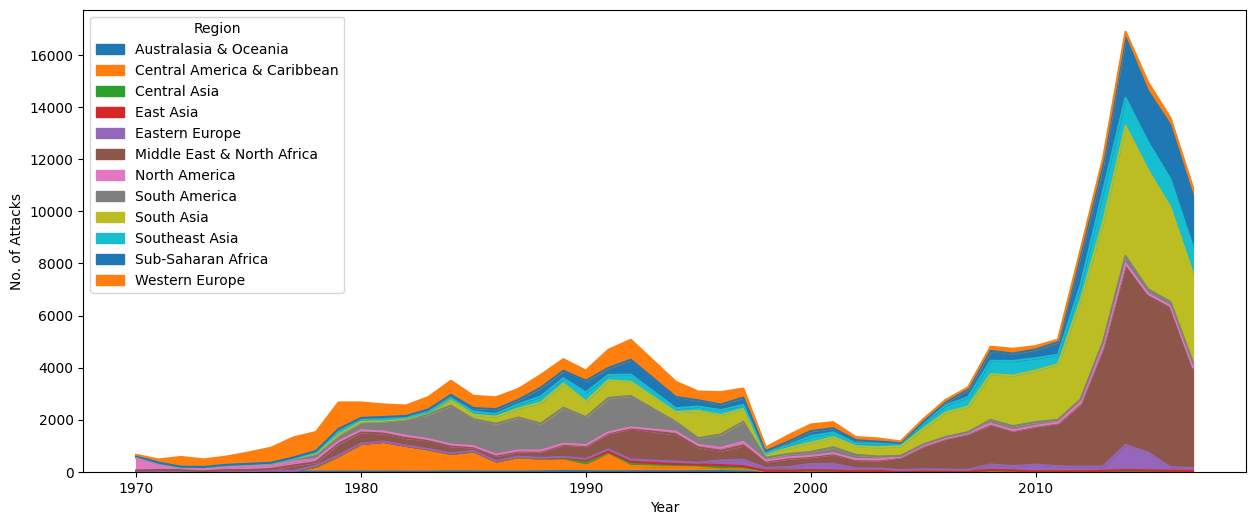

In [35]:
pd.crosstab(data['Year'], data['Region']).plot(kind='area',figsize=(15,6))
plt.ylabel('No. of Attacks')
plt.show()

#Country v/s Attacks

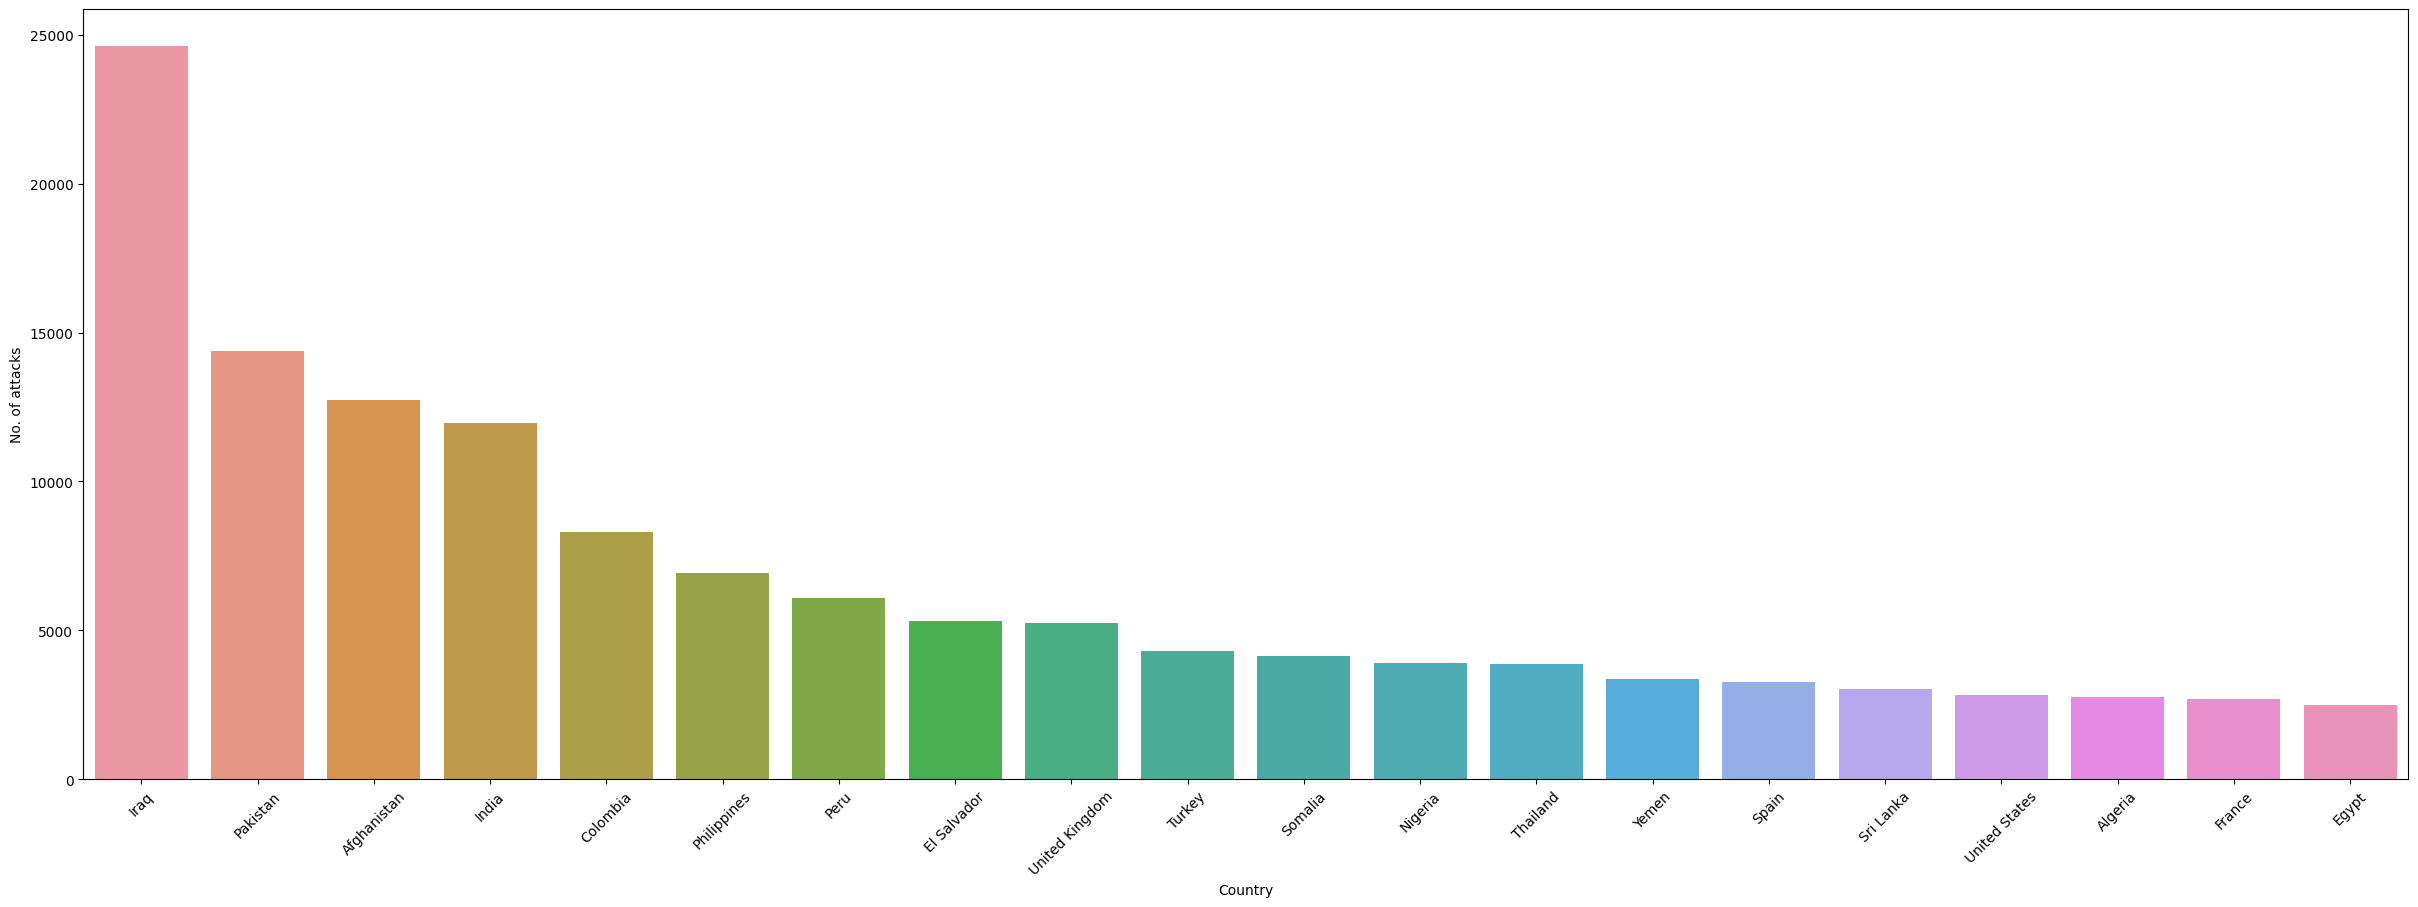

In [43]:
countries = data['Country'].value_counts()[:20].index
attacks = data['Country'].value_counts()[:20].values
plt.figure(figsize = (30,10))
plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('No. of attacks')
sns.barplot(x = countries, y = attacks)
plt.show()

#Groups v/s No. of attacks

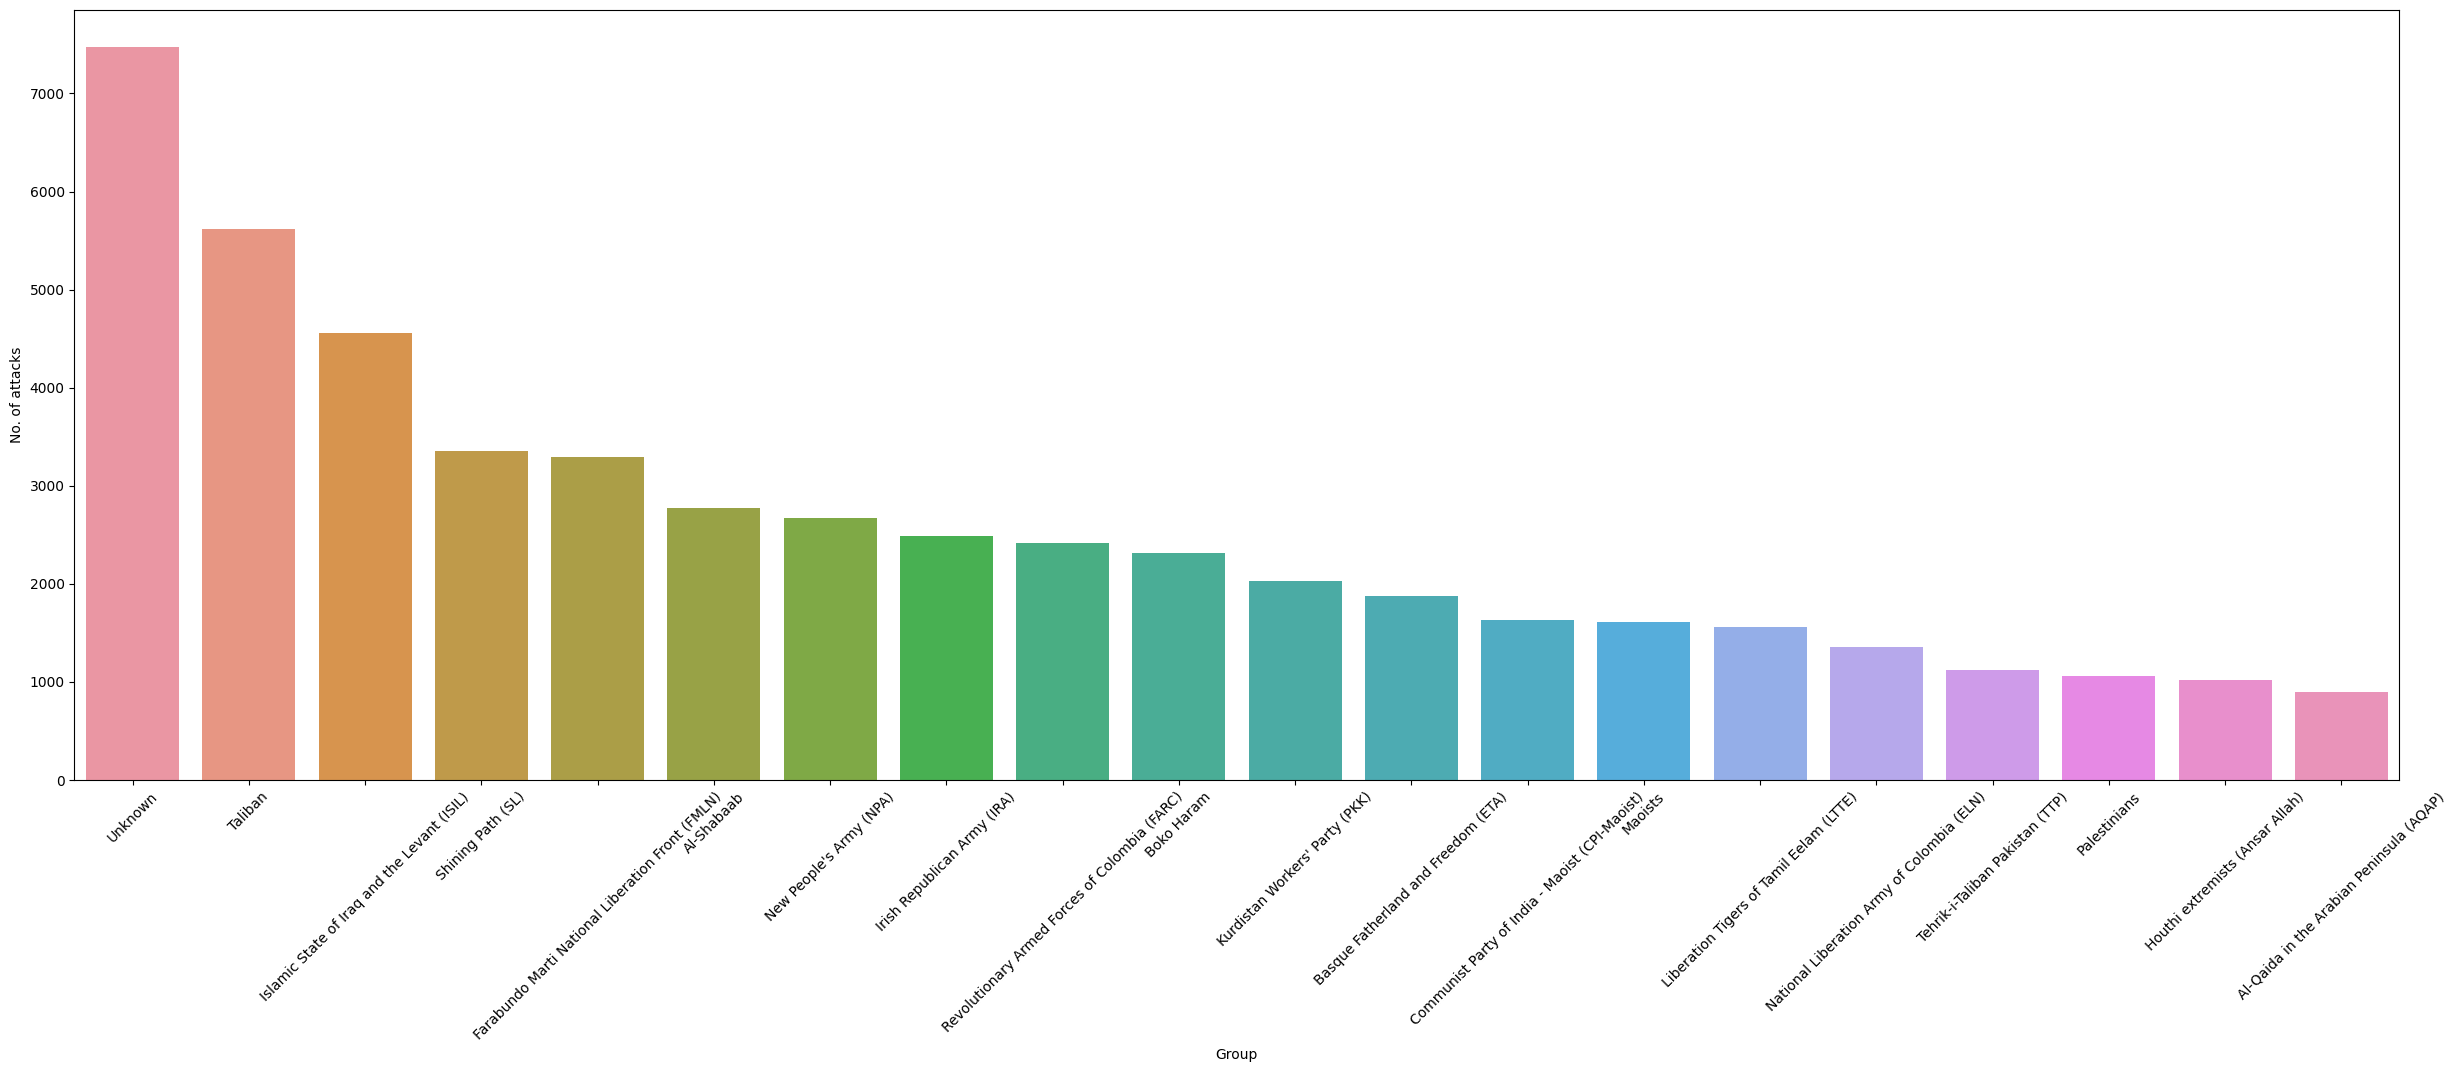

In [45]:

groups = filtered_grp['Group'].value_counts()[:20].index
attacks = filtered_grp['Group'].value_counts()[:20].values
plt.figure(figsize = (30,10))
plt.xticks(rotation = 45)
plt.xlabel('Group')
plt.ylabel('No. of attacks')
sns.barplot(x = countries, y = attacks)
plt.show()

In [48]:
killData = data.loc[:, 'Casualties']
print("Number of people killed in a terrorist attack: ", int(sum(killData.dropna())))

Number of people killed in a terrorist attack:  411868


In [49]:
attackData = data.loc[:, 'AttackType']
typeOfKills = pd.concat([attackData, killData], axis = 1)

In [50]:
typeOfKills.value_counts()

AttackType                      Casualties
Bombing/Explosion               0.0           53613
Armed Assault                   0.0           11770
                                1.0           11189
Assassination                   1.0           11060
Bombing/Explosion               1.0           10974
                                              ...  
Facility/Infrastructure Attack  74.0              1
                                60.0              1
                                56.0              1
                                40.0              1
Unknown                         375.0             1
Length: 643, dtype: int64

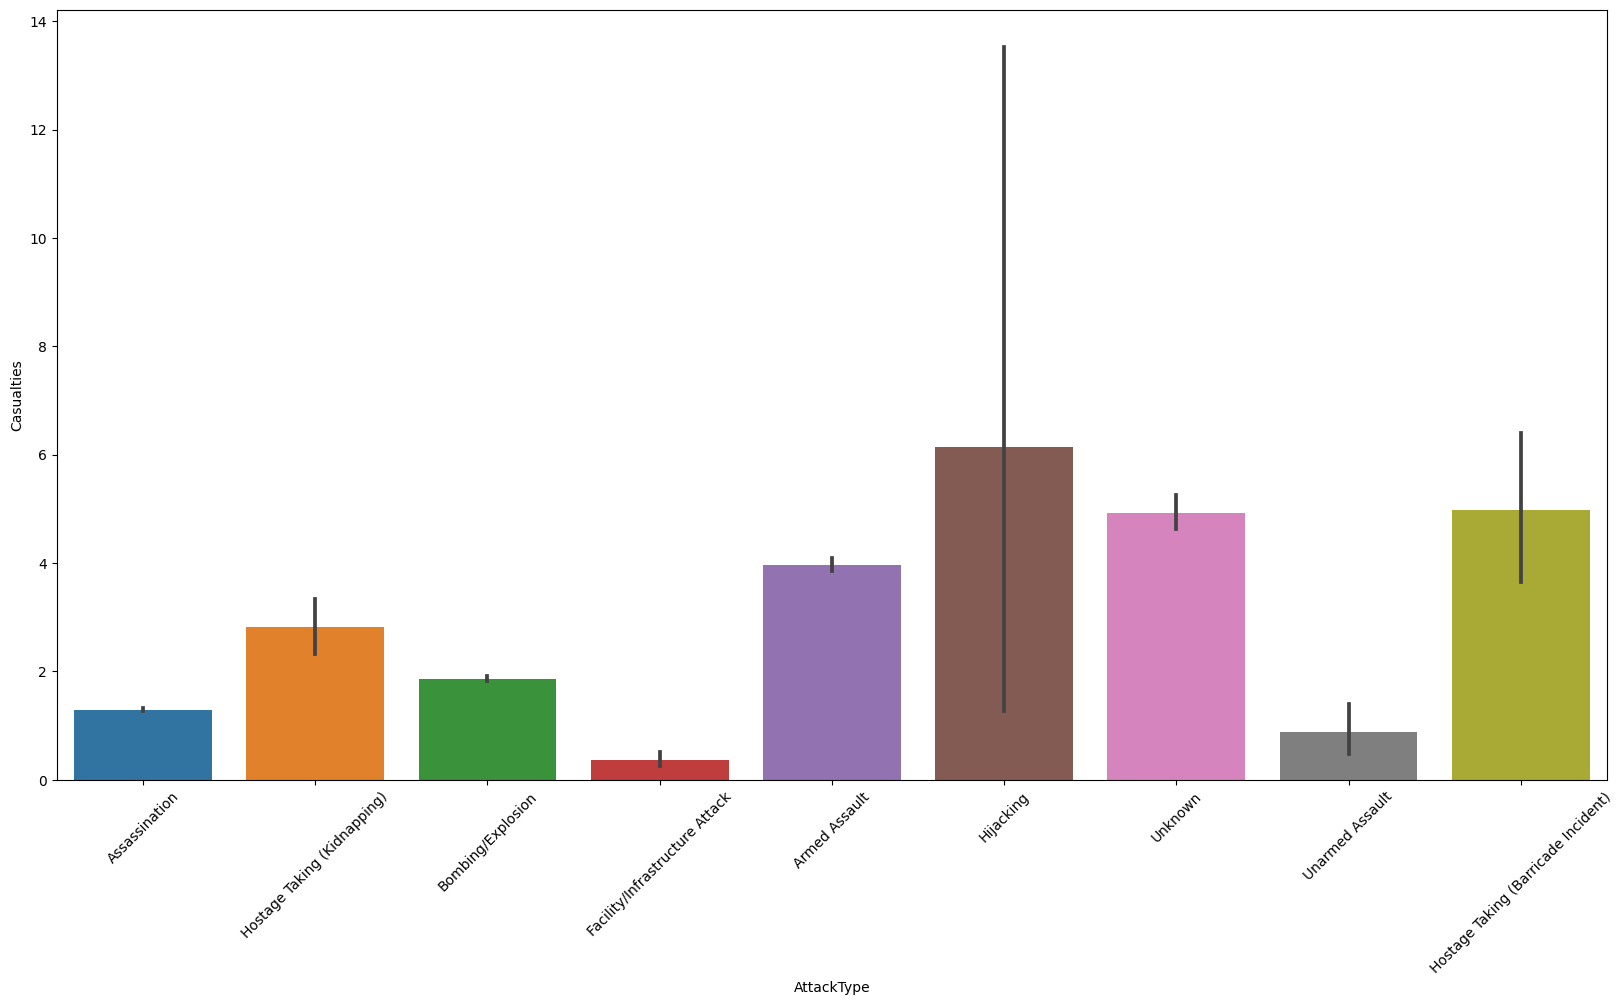

In [57]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
plt.xlabel('Attack Type')
plt.ylabel('No. of Kills')
sns.barplot(x = attackData, y = killData)
plt.show()